In [29]:
# Basic Imports and Required Imports
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")
%matplotlib inline

In [30]:
state_df = pd.read_csv("RS_Session_257_AU_2368_B_3.csv")
state_df.head(20)

,Sl. no.,State/UT,City,Operational Charging stations Under FAME-II
0,1,Delhi,Delhi,15
1,2,Maharashtra,Navi Mumbai,1
2,3,Maharashtra,Nagpur,7
3,4,Tamil Nadu,Chennai,8
4,5,Kerala,Thrissur,8
5,6,Kerala,Ernakulum,6
6,7,Kerala,Kannur,2
7,8,Gujarat,Ahmedabad,2
8,9,Karnataka,Bangalore,1
9,10,Madhya Pradesh,Indore,2


In [31]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Sl. no.                                      12 non-null     object
 1   State/UT                                     12 non-null     object
 2   City                                         12 non-null     object
 3   Operational Charging stations Under FAME-II  12 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [32]:
state_df.describe()


,Operational Charging stations Under FAME-II
count,12.000000
mean,8.833333
std,14.540435
min,1.000000
25%,1.750000
50%,4.000000
75%,8.000000
max,53.000000


In [33]:
new_state_df = state_df.drop(labels=11,axis=0)
new_state_df.head(20)

,Sl. no.,State/UT,City,Operational Charging stations Under FAME-II
0,1,Delhi,Delhi,15
1,2,Maharashtra,Navi Mumbai,1
2,3,Maharashtra,Nagpur,7
3,4,Tamil Nadu,Chennai,8
4,5,Kerala,Thrissur,8
5,6,Kerala,Ernakulum,6
6,7,Kerala,Kannur,2
7,8,Gujarat,Ahmedabad,2
8,9,Karnataka,Bangalore,1
9,10,Madhya Pradesh,Indore,2


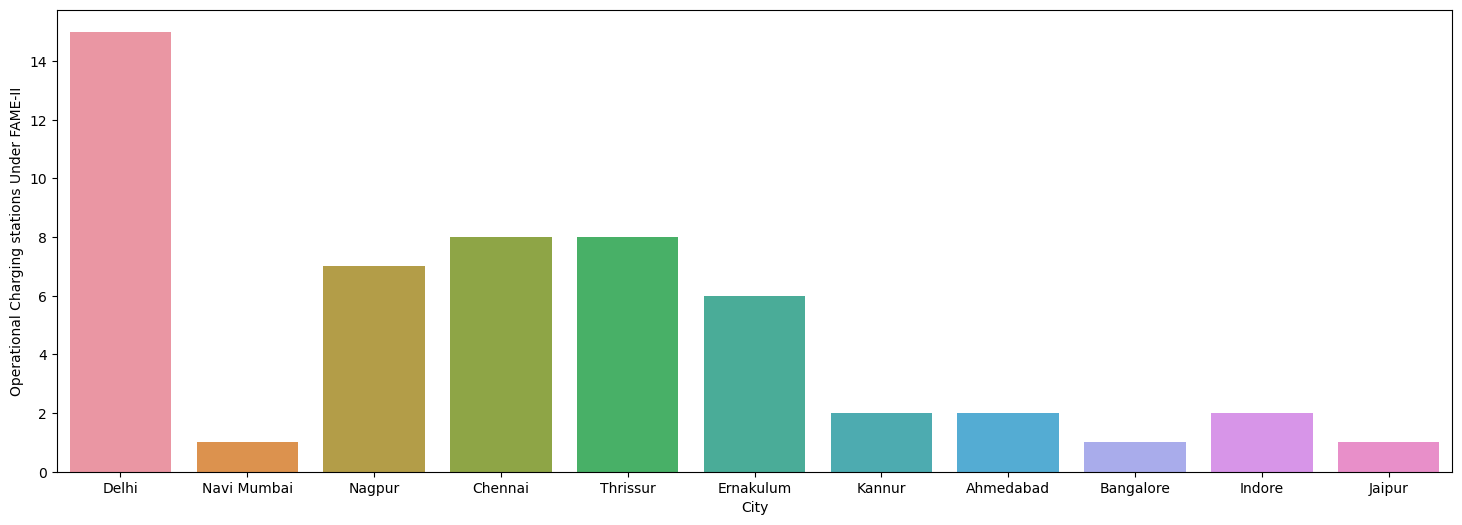

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(x='City',y='Operational Charging stations Under FAME-II',data=new_state_df)
plt.show()

In [35]:
df_EV_numbers = pd.read_csv('geoMap.csv')
df_EV_numbers.head()

,Region,no_of_EV
0,Tamil Nadu,100.0
1,Karnataka,97.0
2,Haryana,88.0
3,Goa,85.0
4,Maharashtra,85.0


In [36]:
# The data was missing so to remove null values, the null values are replaced with zero

df_EV_numbers['no_of_EV'].fillna(0,inplace=True)
df_EV_numbers.isnull().sum()

Region      0
no_of_EV    0
dtype: int64

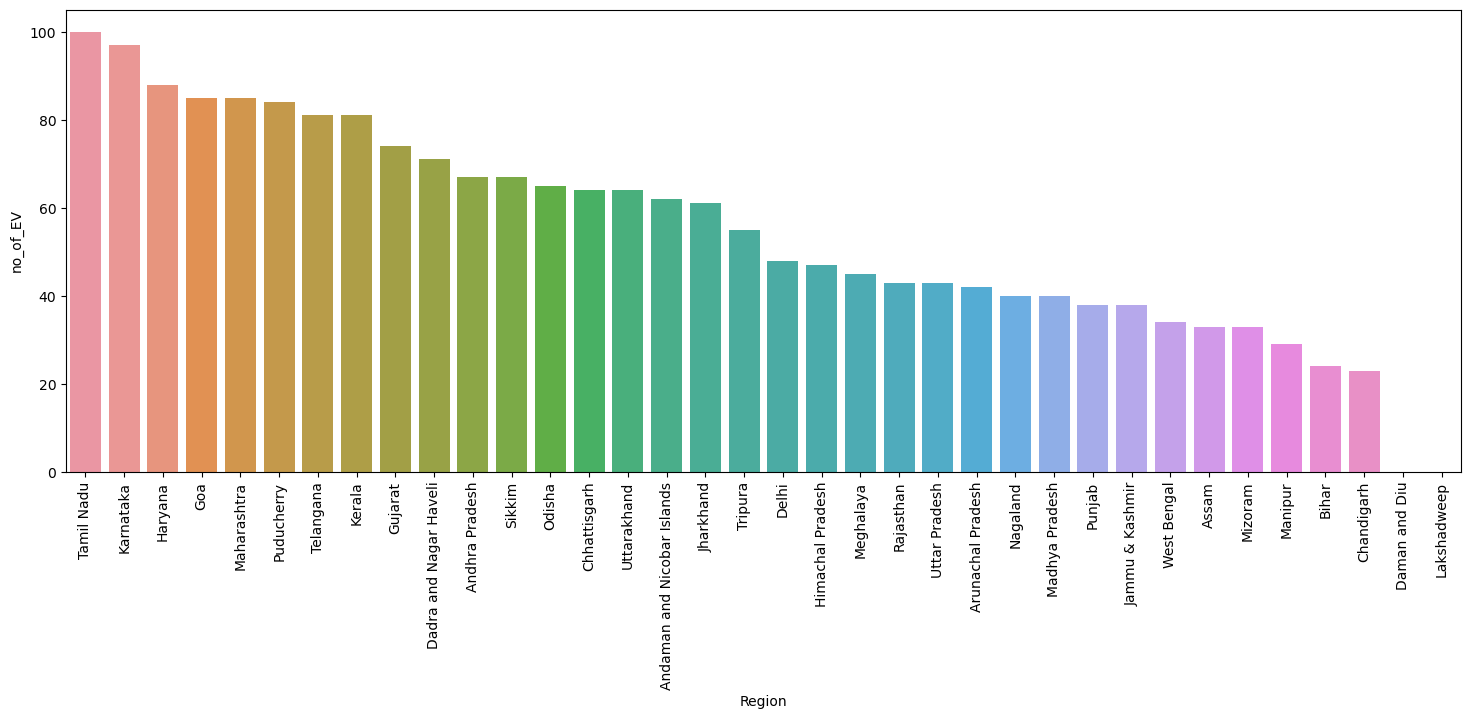

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x='Region',y='no_of_EV',data=df_EV_numbers)
plt.xticks(rotation=90)
plt.show()

In [38]:
df = pd.read_csv('car_data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


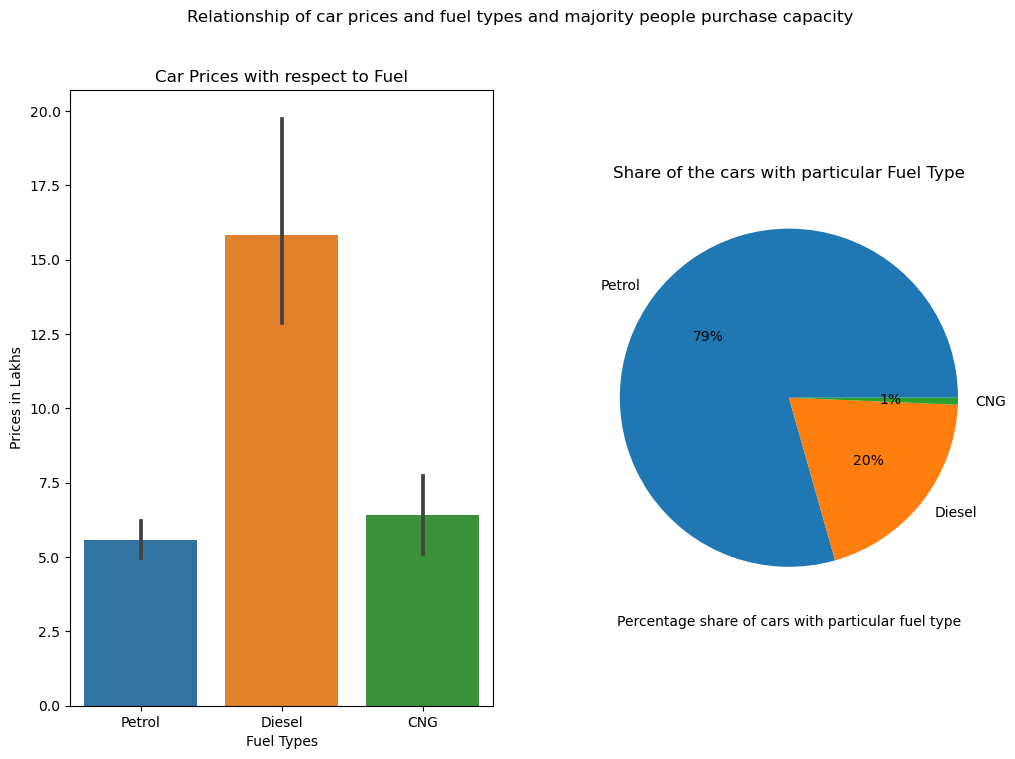

In [39]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

fig.suptitle("Relationship of car prices and fuel types and majority people purchase capacity")

axes[0].set_title("Car Prices with respect to Fuel")
ax1 = sns.barplot(x = list(df['Fuel_Type']),y = list(df['Present_Price']),data=df,ax=axes[0])
ax1.set(xlabel = "Fuel Types",ylabel = "Prices in Lakhs")

dict_df = dict(df['Fuel_Type'].value_counts())
plt.subplot(122)
plt.pie(list(dict_df.values()),labels=list(dict_df.keys()),autopct='%.0f%%')
plt.title("Share of the cars with particular Fuel Type")
plt.xlabel("Percentage share of cars with particular fuel type")

plt.show()

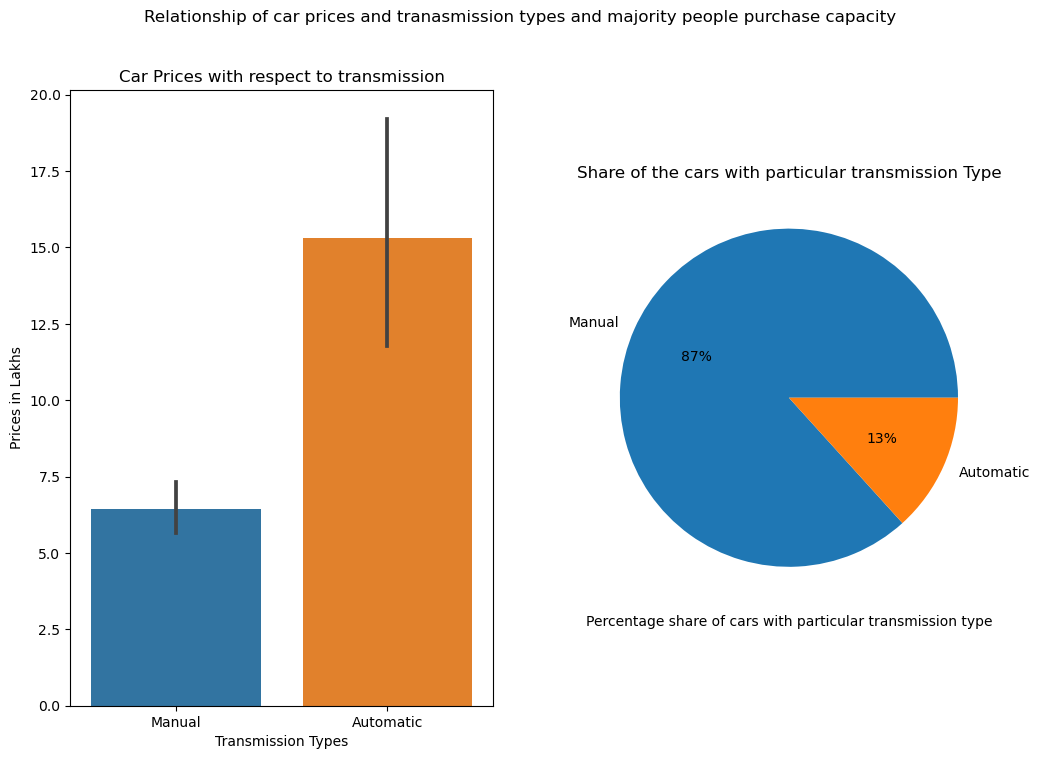

In [40]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

fig.suptitle("Relationship of car prices and tranasmission types and majority people purchase capacity")

axes[0].set_title("Car Prices with respect to transmission")
ax = sns.barplot(x = list(df['Transmission']),y = list(df['Present_Price']),data=df,ax=axes[0])
ax.set(xlabel = "Transmission Types",ylabel = "Prices in Lakhs")


dict_df = dict(df['Transmission'].value_counts())
plt.subplot(122)
plt.pie(list(dict_df.values()),labels=list(dict_df.keys()),autopct='%.0f%%')
plt.title("Share of the cars with particular transmission Type")
plt.xlabel("Percentage share of cars with particular transmission type")

plt.show()

In [41]:
# Step 2) Collecting the data from carwale.com
reviews = pd.read_csv('4-wheeler-EV-carwale.csv')
reviews.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


In [42]:
df_ratings = reviews[['Comfort','Performance','Fuel_Economy','Value_for_Money','Rating']]

df_ratings.head()

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,4,5,5,5,5
1,1,1,1,1,0
2,5,5,5,4,5
3,5,5,5,5,5
4,4,5,3,2,3


In [43]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Comfort          129 non-null    int64
 1   Performance      129 non-null    int64
 2   Fuel_Economy     129 non-null    int64
 3   Value_for_Money  129 non-null    int64
 4   Rating           129 non-null    int64
dtypes: int64(5)
memory usage: 5.2 KB


In [44]:
rating_feature = ['Comfort','Performance','Fuel_Economy','Value_for_Money','Rating']
for feature in rating_feature:
    df_ratings[feature] = np.where(df_ratings[feature] > 3,1,0)
    
df_ratings.mean().round(2)

Comfort            0.88
Performance        0.86
Fuel_Economy       0.86
Value_for_Money    0.76
Rating             0.84
dtype: float64

In [45]:
## Scaling the data
scaler = StandardScaler()
scaler.fit(df_ratings)
scaled_data = scaler.transform(df_ratings)

In [46]:
pca = PCA(n_components=5).fit(scaled_data)
transformed_df = pca.transform(scaled_data)
df_PCA = pd.DataFrame(transformed_df, columns=df_ratings.columns)
df_PCA

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
1,5.284841,-0.481989,-0.594537,-0.170641,0.013197
2,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
3,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
4,2.611371,-0.488159,2.181804,-0.090110,1.801597
...,...,...,...,...,...
124,0.073301,0.439265,1.425795,0.910254,-0.860756
125,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
126,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
127,-0.965448,-0.028228,-0.134805,-0.045831,0.050562


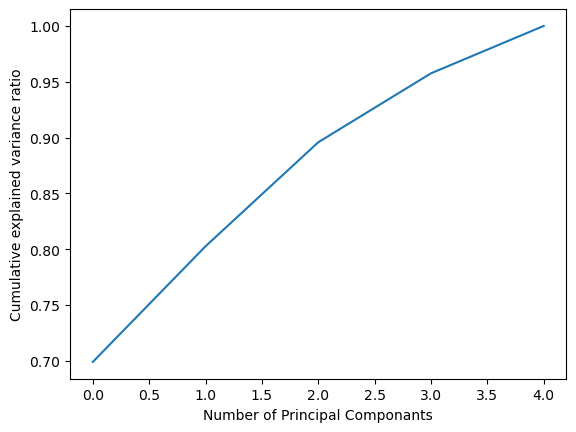

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Componants")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

In [48]:
sd_arr = df_PCA.describe().loc['std']
pca_frame = pd.DataFrame({'std':sd_arr})
sd = pca_frame['std']
pca_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
pca_frame['Cumulative_Proportion'] = np.cumsum(pca_frame['variance'])
pca_frame.head()

,std,variance,Cumulative_Proportion
Comfort,1.876813,0.699024,0.699024
Performance,0.722525,0.103599,0.802623
Fuel_Economy,0.685231,0.093180,0.895803
Value_for_Money,0.557821,0.061750,0.957554
Rating,0.462481,0.042446,1.000000


In [49]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=df_ratings.columns)
pca_df

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,-0.437,-0.454,-0.425,-0.444,-0.474
1,0.379,-0.411,0.700,-0.200,-0.396
2,0.602,0.311,-0.306,-0.667,0.046
3,-0.520,0.590,0.450,-0.409,-0.108
4,0.182,0.423,-0.178,0.389,-0.777


In [52]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1, -1))

col = list(pca_df.columns)
df_PC_list = []

for j in range(0, 5):
    df_PC_list.append(pd.DataFrame(X[j], columns=['PC{}'.format(i) for i in range(1, 6)]))

df_PC = pd.concat(df_PC_list, ignore_index=True)
df_PC[''] = pd.Series(col)
df_PC.set_index(keys='', inplace=True)

df_PC

,PC1,PC2,PC3,PC4,PC5
,,,,,
Comfort,-0.437,0.379,0.602,-0.520,0.182
Performance,-0.454,-0.411,0.311,0.590,0.423
Fuel_Economy,-0.425,0.700,-0.306,0.450,-0.178
Value_for_Money,-0.444,-0.200,-0.667,-0.409,0.389
Rating,-0.474,-0.396,0.046,-0.108,-0.777


In [53]:
!pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 487.7 kB/s eta 0:00:0000:0100:01


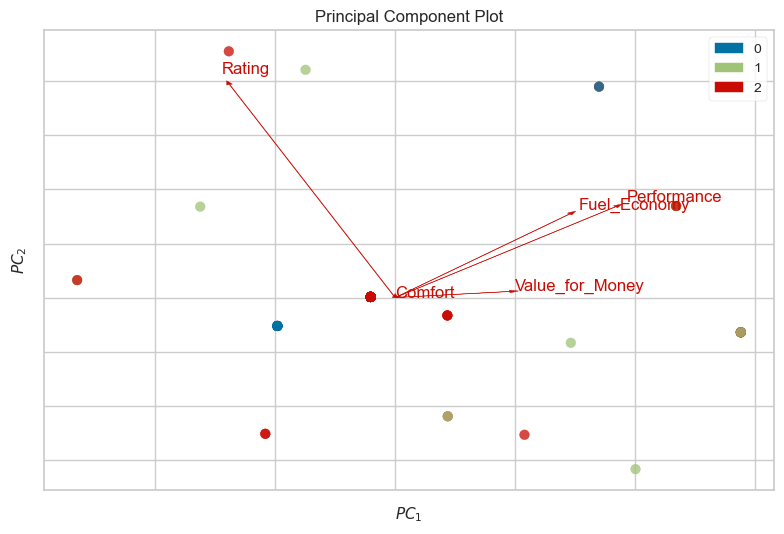

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [54]:
from yellowbrick.features.pca import PCADecomposition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = le.fit_transform(reviews['Sentiments'])
df_PCA['sentiments'] = col
X = df_PCA.drop(columns = 'sentiments')
y = df_PCA['sentiments']
visualizer = PCADecomposition(scale=True, proj_features = True, color = None)
visualizer.fit_transform(X, y)
visualizer.show()

Text(0, 0.5, 'Sum of Within Cluster Distances')

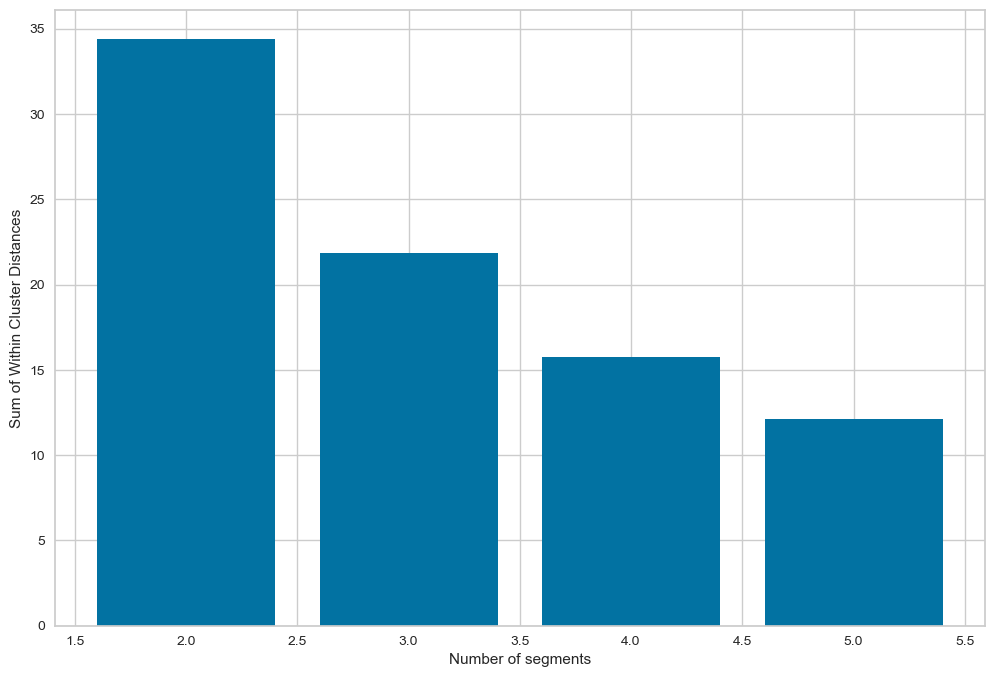

In [55]:
# K-Means Clustering
k_range = range(2, 6)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=7, random_state=0)
    model.fit(df_ratings)
    labels = model.predict(df_ratings)
    inertias.append(model.inertia_)
    k_result.append(labels)
    
plt.figure(figsize=(12,8))
plt.bar(range(2, 6), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

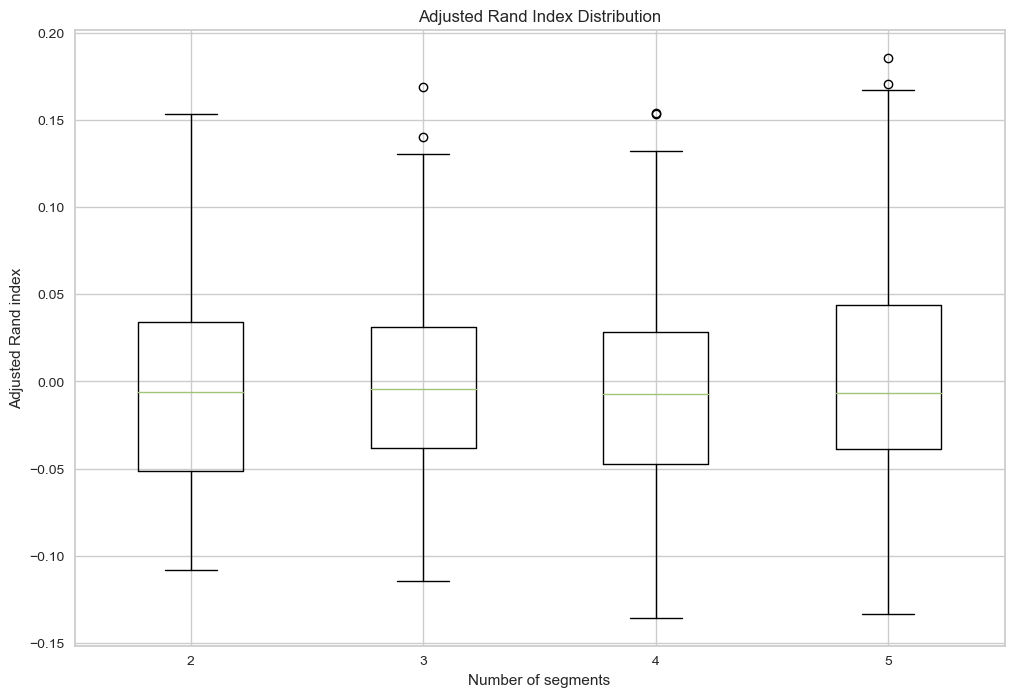

In [56]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 6))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [57]:
#creating segment
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_ratings)
label4 = model.predict(df_ratings)
label4

array([0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0, 3],
      dtype=int32)

In [58]:
# using mixture of distribution
score,aic,bic = [],[],[]

models = []
for k in range(2, 6):
    model = GaussianMixture(n_components=k, n_init=10,random_state=10)
    model.fit(df_ratings)
    models.append(model)
    score.append(model.score(df_ratings))
    aic.append(model.aic(df_ratings))
    bic.append(model.bic(df_ratings))

table = pd.DataFrame({
    'k': k_range,
    'LogLike': score,
    'AIC': aic,
    'BIC': bic
})


table

,k,LogLike,AIC,BIC
0,2,6.819348,-1677.391892,-1560.139584
1,3,8.352548,-2030.957342,-1853.648973
2,4,12.925731,-3168.838618,-2931.474188
3,5,20.499534,-5080.879678,-4783.459188


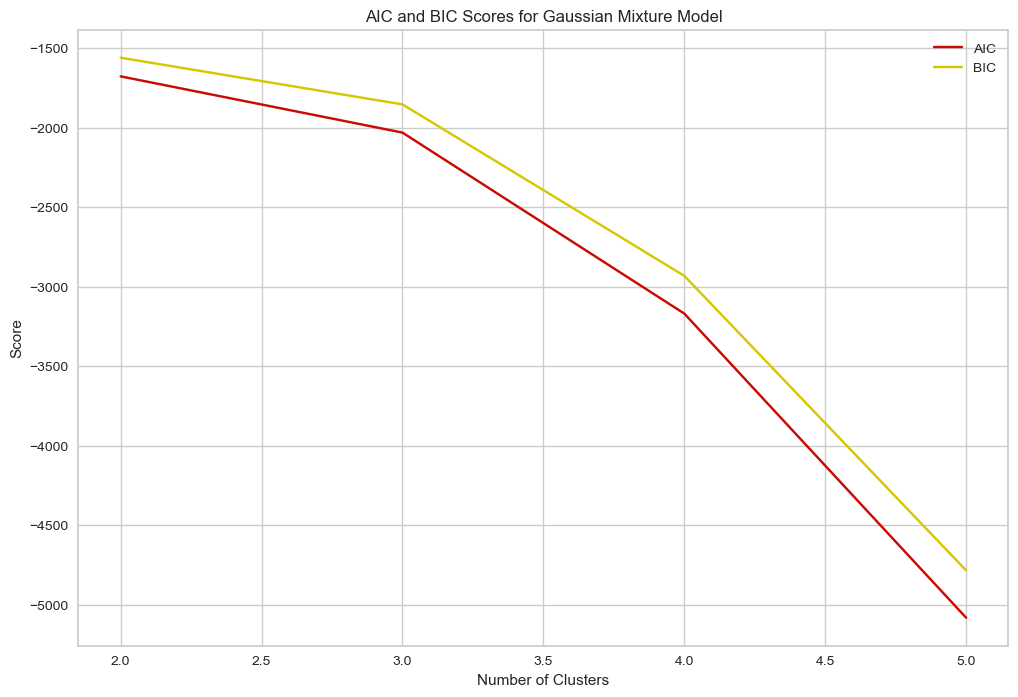

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

In [61]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

g_mixture = GaussianMixture(n_components=5, n_init=10, random_state=0)
g_mixture.fit(df_ratings)

cluster_of_g_mixture = g_mixture.predict(df_ratings)

KMC = KMeans(n_clusters=4,n_init=10,random_state=0)
KMC.fit(df_ratings)
labels = KMC.predict(df_ratings)

confusion_matrix = confusion_matrix(labels, cluster_of_g_mixture)

print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[94  0  2  0  2]
 [ 0 12  0  0  0]
 [ 0  4  1  2  0]
 [ 0  0  4  8  0]
 [ 0  0  0  0  0]]


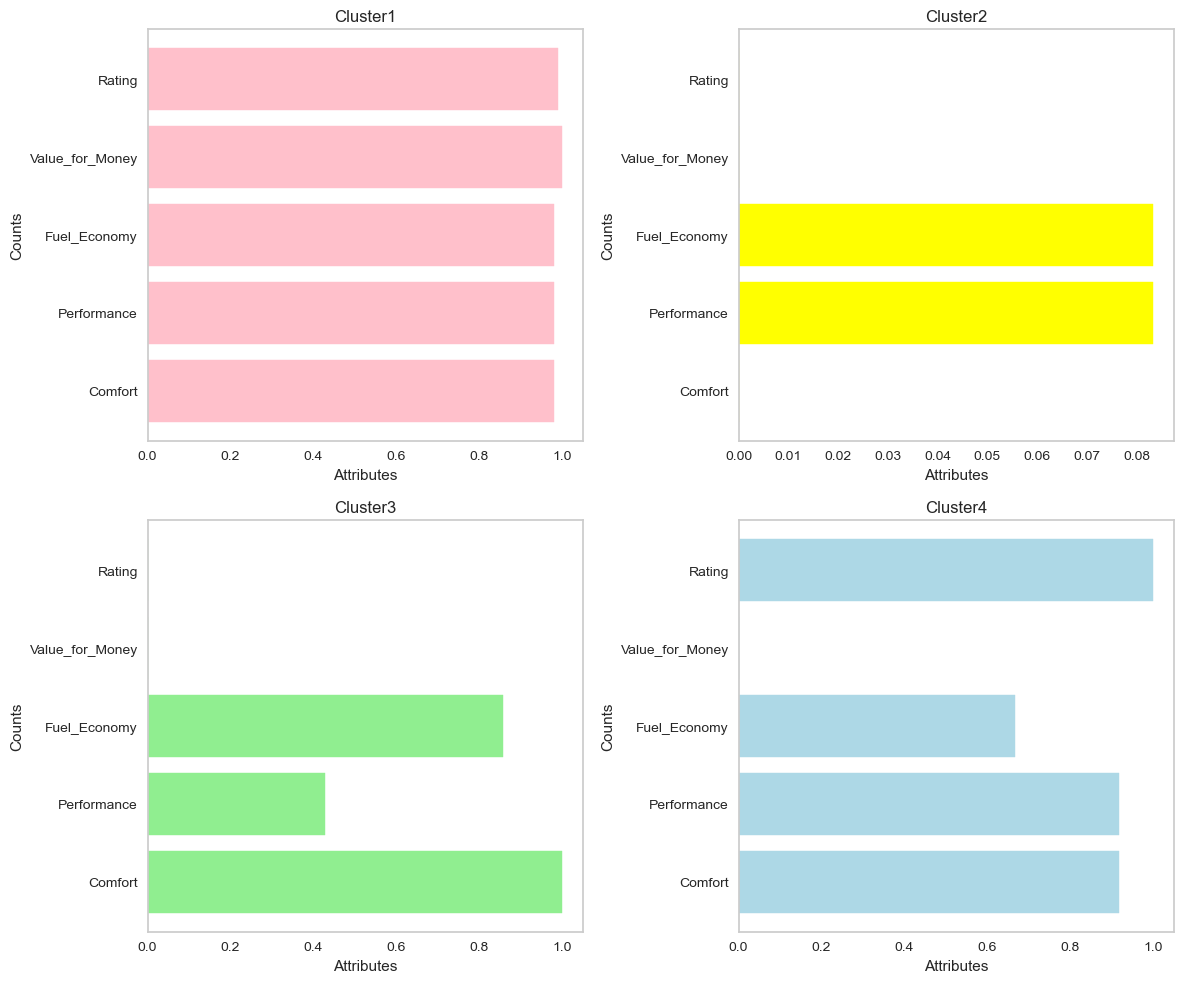

In [63]:
df_copy = df_ratings.copy()
df_copy['segments'] = label4

cluster_dict = {
    'Columns': df_ratings.columns,
    'Cluster1': np.array(np.zeros(6)),
    'Cluster2': np.array(np.zeros(6)),
    'Cluster3': np.array(np.zeros(6)),
    'Cluster4': np.array(np.zeros(6))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(cluster_list,1):
    k_range = [0,1,2,3,4]
    if idx==1: 
        color="pink"
    elif idx==2:
        color="yellow"
    elif idx==3:
        color="lightgreen"
    else:
        color="lightblue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)
    

plt.tight_layout()

plt.show()

In [64]:
# Describing Segments

reviews.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


<Figure size 1200x800 with 0 Axes>

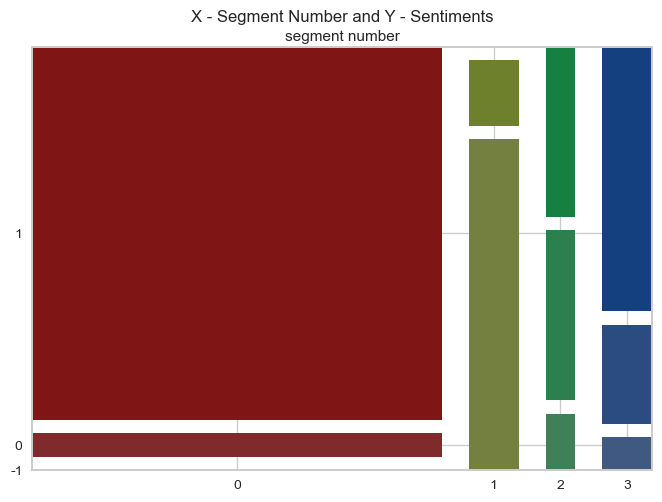

In [65]:
# Let's visualize which we cannot able see in above segment analysis

temp_col = reviews['Sentiments'].replace({
    "Positive":1,
    "Nuetral":0,
    "Negative":-1
})

frame = pd.DataFrame({
    'segment': label4,
    'sentiments': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['sentiments'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k:"")

plt.xlabel('segment number')
plt.ylabel('Sentiments',rotation=90)
plt.title("X - Segment Number and Y - Sentiments")
plt.show()

In [66]:
le = LabelEncoder()

frame = pd.DataFrame({
    'segment': label4,
    'sentiments': temp_col,
    'Driven': reviews['Driven'],
    'Model': reviews['Model_name']
})

driven = {
    'Few hundred kilometers':2, "Haven't driven it":0,
       'Few thousand kilometers':3, 'Did a short drive once':1,
       'Its my mate since ages':4
}

frame['Driven_num'] = frame['Driven'].map(driven)
frame["Model_num"] = le.fit_transform(reviews['Model_name'])+1

driven = frame.groupby('segment')['Driven_num'].mean()
sentiments = frame.groupby('segment')['sentiments'].mean()
model = frame.groupby('segment')["Model_num"].mean()


In [67]:
sentiments # 1 Negative sentiment and 3 positive sentiments can be observed from the 4 segments

segment
0    0.938776
1   -0.833333
2    0.285714
3    0.583333
Name: sentiments, dtype: float64

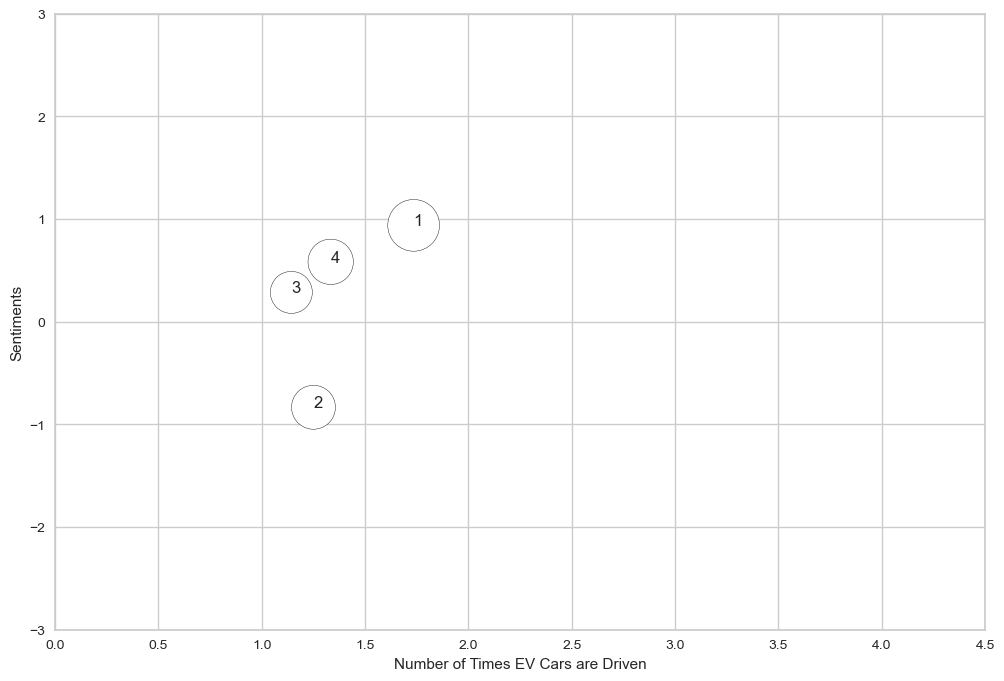

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(driven, sentiments, s=driven*800,color='white',edgecolor="black")

for i, segment in enumerate(driven.index):
    plt.text(driven[segment], sentiments[segment], str(i+1))

plt.xlim(0, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Number of Times EV Cars are Driven')
plt.ylabel('Sentiments')

plt.show()

In [69]:
# New

df = pd.read_csv('EV_Cars_India_2023_cleaned.csv')
df.head()

,Car_name,transmission,Car_price(rs),Battery_Capacity(KwH),Drive_range(KMs),Power(Bhp),Charge_time(Hours)
0,MG Comet EV,Automatic,798000,17.30,230.0,41.42,7.0
1,Tata Tiago EV,Automatic,1199000,19.20,250.0,60.34,1.0
2,Tata Tigor EV,Automatic,1375000,26.00,315.0,73.75,7.5
3,MG ZS EV,Automatic,2740000,50.30,461.0,174.33,9.0
4,BYD Atto 3,Automatic,3449000,60.48,521.0,201.15,10.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_name               30 non-null     object 
 1   transmission           30 non-null     object 
 2   Car_price(rs)          30 non-null     int64  
 3   Battery_Capacity(KwH)  30 non-null     float64
 4   Drive_range(KMs)       30 non-null     float64
 5   Power(Bhp)             30 non-null     float64
 6   Charge_time(Hours)     30 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ KB


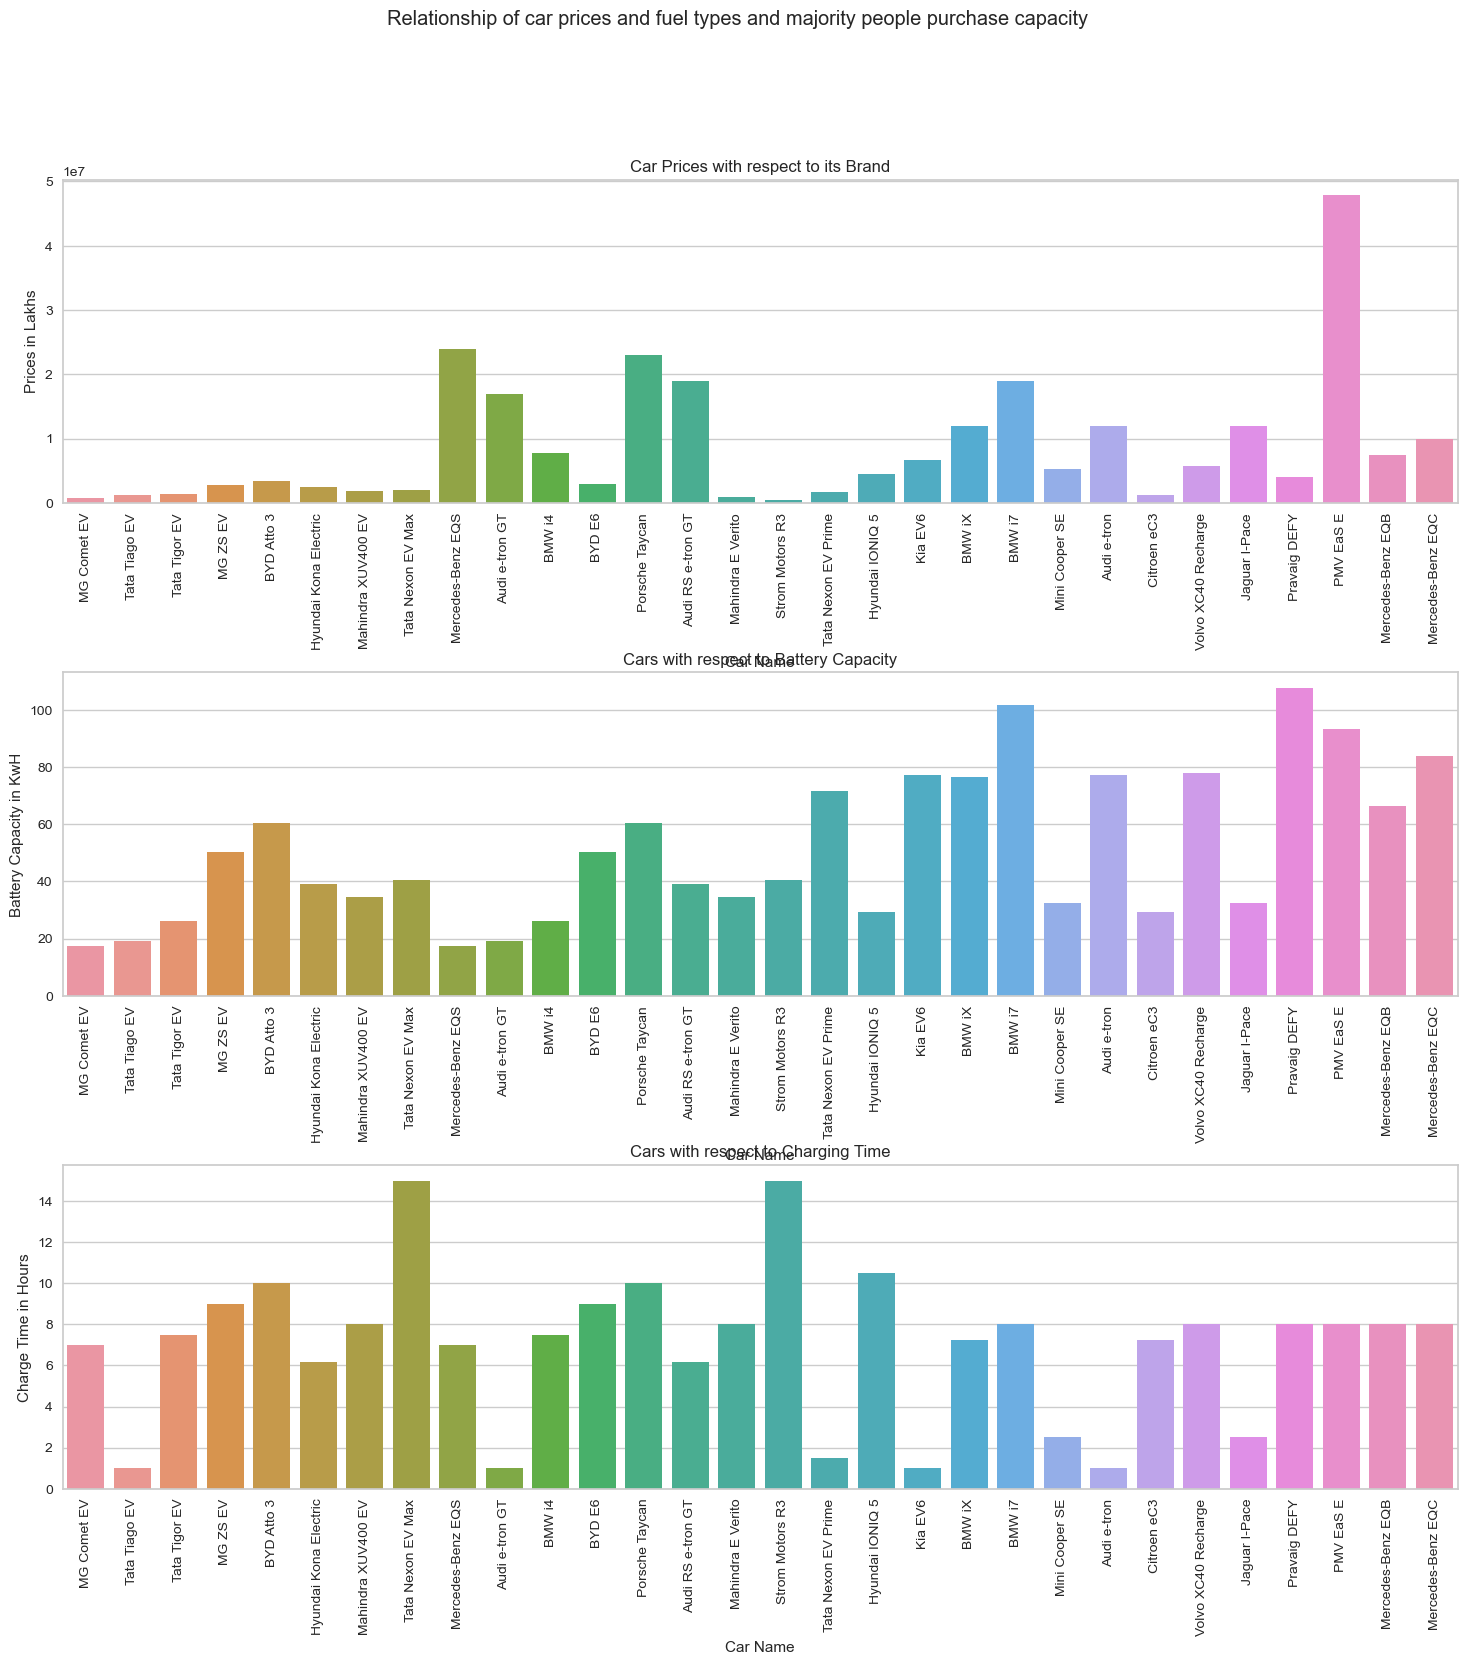

In [71]:
fig,axes = plt.subplots(3,1,figsize=(18,17))

fig.suptitle("Relationship of car prices and fuel types and majority people purchase capacity")
fig.subplots_adjust(hspace=0.525, wspace=0.525)

axes[0].set_title("Car Prices with respect to its Brand")
ax1 = sns.barplot(x = list(df['Car_name']),y = list(df['Car_price(rs)']),data=df,ax=axes[0])
ax1.set(xlabel = "Car Name",ylabel = "Prices in Lakhs")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)


axes[1].set_title("Cars with respect to Battery Capacity")
ax2 = sns.barplot(x = list(df['Car_name']),y = list(df['Battery_Capacity(KwH)']),data=df,ax=axes[1])
ax2.set(xlabel = "Car Name",ylabel = "Battery Capacity in KwH")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)


axes[2].set_title("Cars with respect to Charging Time")
ax3 = sns.barplot(x = list(df['Car_name']),y = list(df['Charge_time(Hours)']),data=df,ax=axes[2])
ax3.set(xlabel = "Car Name",ylabel = "Charge Time in Hours")
ax3.set_xticklabels(ax2.get_xticklabels(),rotation=90)

plt.show()


In [72]:
####### Best Car Evaluation

price_dict = pd.Series(df['Car_price(rs)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(price_dict.items(),key=lambda x:x[1]))
top_cheap_ev = []
lis = list(sorted_prices.keys())
for i in range(15):
    top_cheap_ev.append(lis[i])
    

    
### get the car which has good less charging time

charge_dict = pd.Series(df['Charge_time(Hours)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(charge_dict.items(),key=lambda x:x[1]))
less_charge_time = []
lis = list(sorted_prices.keys())
for i in range(25):
    less_charge_time.append(lis[i])
    

    
## get the car with good battery capacity

battery_dict = pd.Series(df['Battery_Capacity(KwH)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(battery_dict.items(),key=lambda x:x[1],reverse=True))
good_battery = []
lis = list(sorted_prices.keys())
for i in range(25):
    good_battery.append(lis[i])
    

    
### get thecars with good drive range
drive_dict = pd.Series(df['Drive_range(KMs)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(drive_dict.items(),key=lambda x:x[1],reverse=True))
good_drive_range = []
lis = list(sorted_prices.keys())
for i in range(25):
    good_drive_range.append(lis[i])
    
good_drive_range # Top cars with good battery capacity

['Pravaig DEFY',
 'Kia EV6',
 'Audi e-tron',
 'BMW i7',
 'Volvo XC40 Recharge',
 'Mercedes-Benz EQC',
 'BYD Atto 3',
 'Porsche Taycan',
 'PMV EaS E',
 'MG ZS EV',
 'BYD E6',
 'Tata Nexon EV Max',
 'Strom Motors R3',
 'Hyundai Kona Electric',
 'Audi RS e-tron GT',
 'BMW iX',
 'Citroen eC3',
 'Tata Nexon EV Prime',
 'Mercedes-Benz EQB',
 'Mahindra XUV400 EV',
 'Mahindra E Verito',
 'Hyundai IONIQ 5',
 'Tata Tigor EV',
 'BMW i4',
 'Mini Cooper SE']

In [73]:
###  get top cars with have less priced, good battery capacity, less charging time, good drive range

best_cars = []

for car in top_cheap_ev:
    if car in good_drive_range and car in good_battery and car in less_charge_time:
        best_cars.append(car)
        
best_cars

['Mahindra E Verito',
 'Citroen eC3',
 'Tata Tigor EV',
 'Tata Nexon EV Prime',
 'Mahindra XUV400 EV',
 'Hyundai Kona Electric',
 'MG ZS EV',
 'BYD E6',
 'Pravaig DEFY']

In [75]:
###################### The Below data frame has the best cars with respect to price, battery, brand, charge time and range

indexes = []
for car in best_cars:
    i = np.where(df['Car_name'] == car)
    indexes.append(i[0][0])

# Collect rows in a list
rows = []
for index in indexes:
    rows.append(df.iloc[index])

# Concatenate the list of rows into a new DataFrame
new_frame = pd.concat(rows, axis=1).T.reset_index(drop=True)

new_frame

,Car_name,transmission,Car_price(rs),Battery_Capacity(KwH),Drive_range(KMs),Power(Bhp),Charge_time(Hours)
0,Mahindra E Verito,Automatic,946000,34.5,375.0,95.0,8.0
1,Citroen eC3,Automatic,1276000,29.2,425.0,321.84,7.25
2,Tata Tigor EV,Automatic,1375000,26.0,315.0,73.75,7.5
3,Tata Nexon EV Prime,Automatic,1719000,71.7,415.0,93.87,1.5
4,Mahindra XUV400 EV,Automatic,1898999,34.5,375.0,148.0,8.0
5,Hyundai Kona Electric,Automatic,2403000,39.2,452.0,134.1,6.16
6,MG ZS EV,Automatic,2740000,50.3,461.0,174.33,9.0
7,BYD E6,Automatic,2915000,50.3,461.0,174.33,9.0
8,Pravaig DEFY,Automatic,3950000,107.8,857.0,516.29,8.0


In [76]:
# Lets get the Best range prices and the best technical detail


min_price = min(list(new_frame['Car_price(rs)']))
max_price = max(list(new_frame['Car_price(rs)']))
min_capacity = min(list(new_frame['Battery_Capacity(KwH)']))
max_capacity = max(list(new_frame['Battery_Capacity(KwH)']))
min_drive_range = min(list(new_frame['Drive_range(KMs)']))
max_drive_range = max(list(new_frame['Drive_range(KMs)']))
min_power = min(list(new_frame['Power(Bhp)']))
max_power = max(list(new_frame['Power(Bhp)']))
min_charge_time = min(list(new_frame['Charge_time(Hours)']))
max_charge_time = max(list(new_frame['Charge_time(Hours)']))

Best_Range = {
    "Price_Range":"{0} Lakhs - {1} Lakhs".format(min_price,max_price),
    "Battery_Capacity":"{0} KwH - {1} KwH".format(min_capacity,max_capacity),
    "Driving_Range":"{0} KMs - {1} KMs".format(min_drive_range,max_drive_range),
    "Power_Range":"{0} BHP - {1} BHP".format(min_power,max_power),
    "Charging_Time_Range":"{0} Hours - {1} Hours".format(min_charge_time,max_charge_time),
}

Best_Range = pd.Series(Best_Range).to_frame()
Best_Range.rename(columns={0:'Ranges'},inplace=True)
Best_Range

,Ranges
Price_Range,946000 Lakhs - 3950000 Lakhs
Battery_Capacity,26.0 KwH - 107.8 KwH
Driving_Range,315.0 KMs - 857.0 KMs
Power_Range,73.75 BHP - 516.29 BHP
Charging_Time_Range,1.5 Hours - 9.0 Hours


In [77]:
os.makedirs(os.getcwd(),exist_ok=True)
Best_Range.to_csv(os.path.join("Best_Range.csv"),header=False,index=False)